In [1]:
import pandas as pd
import string

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import squarify

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df_orders_item = pd.read_csv(r"C:\Study\Business Intel\archive (10)\order_items.csv")

In [4]:
df_orders_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181759 entries, 0 to 181758
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 181759 non-null  int64  
 1   order_id           181759 non-null  int64  
 2   user_id            181759 non-null  int64  
 3   product_id         181759 non-null  int64  
 4   inventory_item_id  181759 non-null  int64  
 5   status             181759 non-null  object 
 6   created_at         181759 non-null  object 
 7   shipped_at         118281 non-null  object 
 8   delivered_at       63841 non-null   object 
 9   returned_at        18232 non-null   object 
 10  sale_price         181759 non-null  float64
dtypes: float64(1), int64(5), object(5)
memory usage: 15.3+ MB


In [4]:
invalid_values = []  # Danh sách chứa các giá trị lỗi


In [5]:
def check_and_convert(value):
    try:
        # Thử chuyển đổi thành datetime
        return pd.to_datetime(value)
    except Exception as e:
        # Nếu có lỗi, thêm giá trị vào danh sách invalid_values
        invalid_values.append(value)
        return value  # Trả về giá trị gốc nếu không thể chuyển đổi

# Áp dụng hàm trên cột 'delivered_at'
df_orders_item['delivered_at'] = df_orders_item['delivered_at'].apply(check_and_convert)

# Xuất các giá trị lỗi
print("Các giá trị không hợp lệ trước khi chuyển đổi thành NaT:")
print(invalid_values)

Các giá trị không hợp lệ trước khi chuyển đổi thành NaT:
[]


In [ ]:
def check_and_convert(value):
    try:
        # Thử chuyển đổi thành datetime
        return pd.to_datetime(value)
    except Exception as e:
        # Nếu có lỗi, thêm giá trị vào danh sách invalid_values
        invalid_values.append(value)
        return value  # Trả về giá trị gốc nếu không thể chuyển đổi

# Áp dụng hàm trên cột 'delivered_at'
df_orders_item['shipped_at'] = df_orders_item['shipped_at'].apply(check_and_convert)

# Xuất các giá trị lỗi
print("Các giá trị không hợp lệ trước khi chuyển đổi thành NaT:")
print(invalid_values)

In [ ]:
def check_and_convert(value):
    try:
        # Thử chuyển đổi thành datetime
        return pd.to_datetime(value)
    except Exception as e:
        # Nếu có lỗi, thêm giá trị vào danh sách invalid_values
        invalid_values.append(value)
        return value  # Trả về giá trị gốc nếu không thể chuyển đổi

# Áp dụng hàm trên cột 'delivered_at'
df_orders_item['created_at'] = df_orders_item['created_at'].apply(check_and_convert)

# Xuất các giá trị lỗi
print("Các giá trị không hợp lệ trước khi chuyển đổi thành NaT:")
print(invalid_values)

Các giá trị không hợp lệ trước khi chuyển đổi thành NaT:
[]


In [ ]:
def check_and_convert(value):
    try:
        # Thử chuyển đổi thành datetime
        return pd.to_datetime(value)
    except Exception as e:
        # Nếu có lỗi, thêm giá trị vào danh sách invalid_values
        invalid_values.append(value)
        return value  # Trả về giá trị gốc nếu không thể chuyển đổi

# Áp dụng hàm trên cột 'delivered_at'
df_orders_item['returned_at'] = df_orders_item['returned_at'].apply(check_and_convert)

# Xuất các giá trị lỗi
print("Các giá trị không hợp lệ trước khi chuyển đổi thành NaT:")
print(invalid_values)

Các giá trị không hợp lệ trước khi chuyển đổi thành NaT:
[]


In [36]:
print(invalid_values)

[]


In [50]:
df_orders_item.to_csv('C:\\Study\\Business Intel\\archive (10)\\order_items.csv')

In [ ]:
df_orders_item.isna().sum()

id                        0
order_id                  0
user_id                   0
product_id                0
inventory_item_id         0
status                    0
created_at                0
shipped_at            63478
delivered_at         117918
returned_at          163527
sale_price                0
dtype: int64

In [ ]:
filtered_df_oi = df_orders_item[df_orders_item['status'] == 'Complete']
filtered_df_oi.info()

In [40]:
filtered_df_oi.head(2)

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price
1,40993,28204,22551,14235,110590,Complete,2023-03-14 03:47:21+00:00,2023-03-15 22:57:00+00:00,2023-03-18 01:08:00+00:00,NaN,0.02
2,51224,35223,28215,14235,138236,Complete,2023-12-05 13:25:30+00:00,2023-12-06 01:20:00+00:00,2023-12-10 10:04:00+00:00,NaN,0.02


In [11]:
print(filtered_df_oi[filtered_df_oi['user_id'] == 99970])


Empty DataFrame
Columns: [id, order_id, user_id, product_id, inventory_item_id, status, created_at, shipped_at, delivered_at, returned_at, sale_price]
Index: []


**Tính frequency**

In [ ]:
frequency = df_orders_item.groupby('user_id')['order_id'].count()


In [ ]:
frequency.info()

<class 'pandas.core.series.Series'>
Index: 80044 entries, 1 to 100000
Series name: order_id
Non-Null Count  Dtype
--------------  -----
80044 non-null  int64
dtypes: int64(1)
memory usage: 1.2 MB


In [ ]:
userss_with_one_order = (frequency == 1).sum()

print(f"Number of users with exactly 1 order: {userss_with_one_order}")

Number of users with exactly 1 order: 34996


In [12]:
frequency = filtered_df_oi.groupby('user_id')['order_id'].count()
frequency = frequency.rename('frequency')


In [13]:
frequency.info()


<class 'pandas.core.series.Series'>
Index: 27026 entries, 2 to 99986
Series name: frequency
Non-Null Count  Dtype
--------------  -----
27026 non-null  int64
dtypes: int64(1)
memory usage: 422.3 KB


In [13]:
users_with_one_order = (frequency == 1).sum()

print(f"Number of users with exactly 1 order: {users_with_one_order}")

Number of users with exactly 1 order: 16649


In [41]:
current_time = max(filtered_df_oi['delivered_at'])  # Thời gian cuối cùng trong dataset
filtered_df_oi['diff'] = current_time - filtered_df_oi['delivered_at']  # Tính sự chênh lệch

# Tính recency cho mỗi customer_id (thời gian gần nhất của mỗi khách hàng)
recency = filtered_df_oi.groupby('user_id')['diff'].min()  # Lấy giá trị min của diff cho mỗi customer_id

# Chuyển đổi recency thành số ngày
recency = recency.dt.days

# In kết quả recency
print(recency)


user_id
2         700
3         293
4         461
17       1177
18        199
         ... 
99969      72
99970      10
99980     672
99983     151
99986     125
Name: diff, Length: 27703, dtype: int64


In [15]:
filtered_df_oi.columns

Index(['id', 'order_id', 'user_id', 'product_id', 'inventory_item_id',
       'status', 'created_at', 'shipped_at', 'delivered_at', 'returned_at',
       'sale_price', 'diff'],
      dtype='object')

In [16]:

monetary = filtered_df_oi.groupby('user_id')['sale_price'].sum()
monetary.head()

user_id
2      22.000000
3     123.470001
4     148.000000
17    726.539986
18     25.000000
Name: sale_price, dtype: float64

In [17]:
rfm = pd.merge(frequency, recency, on='user_id', how = 'inner')
rfm = pd.merge(rfm, monetary, on='user_id', how = 'inner')

In [18]:
rfm

,frequency,diff,sale_price
user_id,,,
2,1,699,22.000000
3,2,292,123.470001
4,1,460,148.000000
17,6,1176,726.539986
18,1,198,25.000000
...,...,...,...
99967,1,715,178.000000
99969,3,71,150.940002
99980,2,671,134.989998


In [19]:
rfm = rfm.rename(columns={'diff': 'recency', 'sale_price': 'monetary'})


In [20]:
rfm = rfm[['recency', 'frequency', 'monetary']]
rfm

,recency,frequency,monetary
user_id,,,
2,699,1,22.000000
3,292,2,123.470001
4,460,1,148.000000
17,1176,6,726.539986
18,198,1,25.000000
...,...,...,...
99967,715,1,178.000000
99969,71,3,150.940002
99980,671,2,134.989998


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10248\1095790518.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm[col])


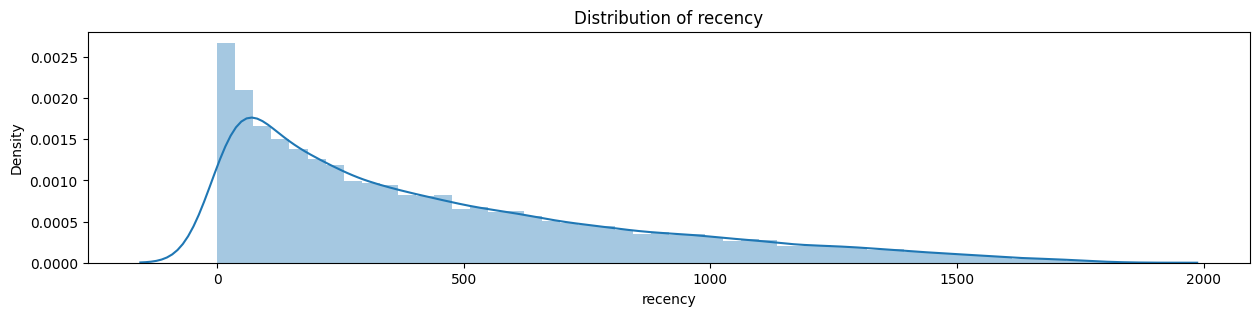

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10248\1095790518.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm[col], bins=10)


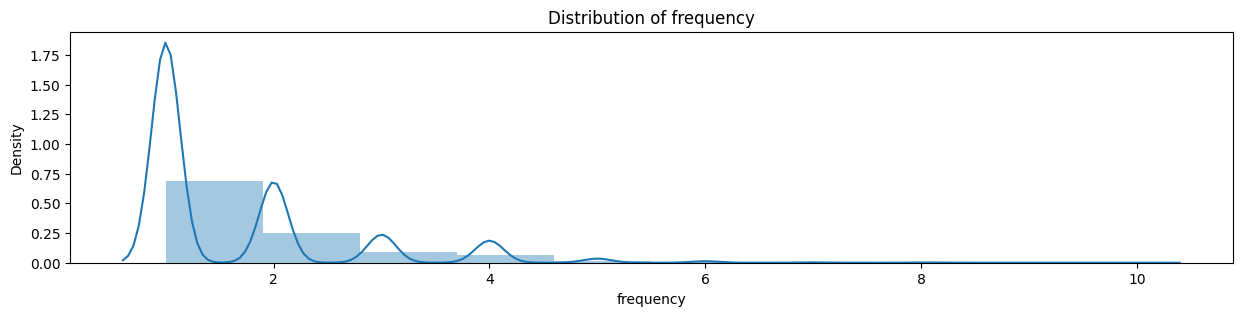

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10248\1095790518.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm[col])


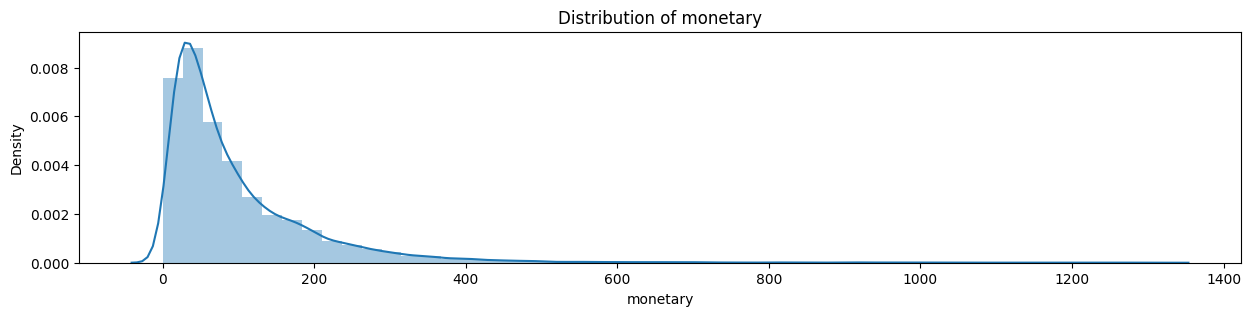

In [22]:
column_names = ['recency', 'frequency', 'monetary']

for col in column_names:
    fig, ax = plt.subplots(figsize=(15,3))
    if col == 'frequency':
        sns.distplot(rfm[col], bins=10)
    else:
        sns.distplot(rfm[col])
    ax.set_title('Distribution of %s' % col)
    plt.show()

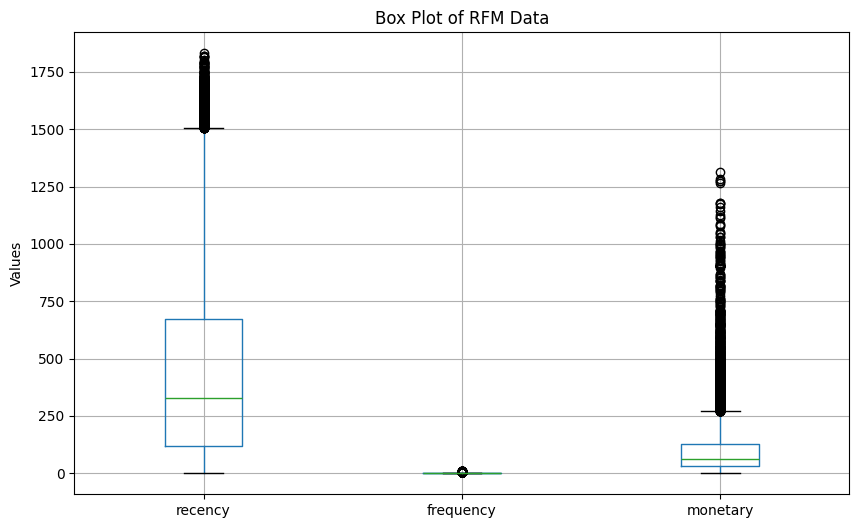

In [23]:
plt.figure(figsize=(10, 6))
rfm.boxplot(column=['recency', 'frequency', 'monetary'])
plt.title('Box Plot of RFM Data')
plt.ylabel('Values')
plt.show()

In [24]:

scaler = StandardScaler()
rfm_scaler = rfm[['recency', 'frequency', 'monetary']]
rfm_scaler = scaler.fit_transform(rfm_scaler)
rfm_scaler = pd.DataFrame(rfm_scaler, columns=['recency', 'frequency', 'monetary'])

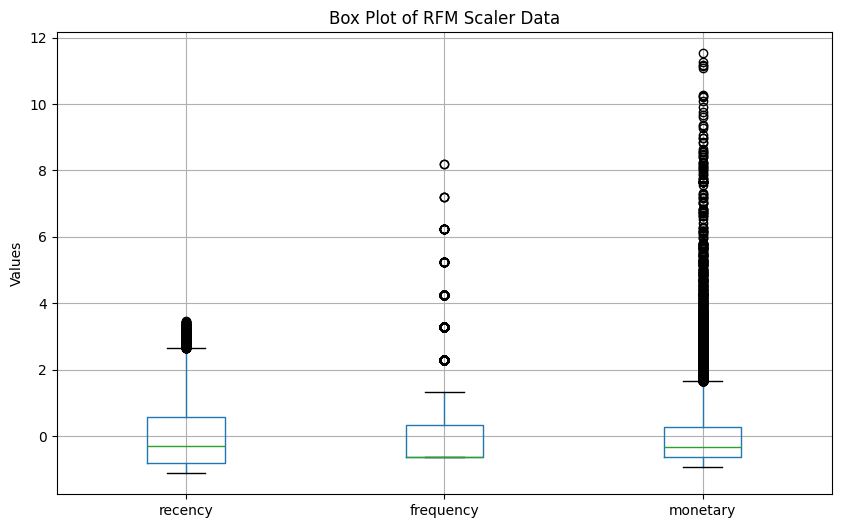

In [25]:

plt.figure(figsize=(10, 6))
rfm_scaler.boxplot(column=['recency', 'frequency', 'monetary'])
plt.title('Box Plot of RFM Scaler Data')
plt.ylabel('Values')
plt.show()
     

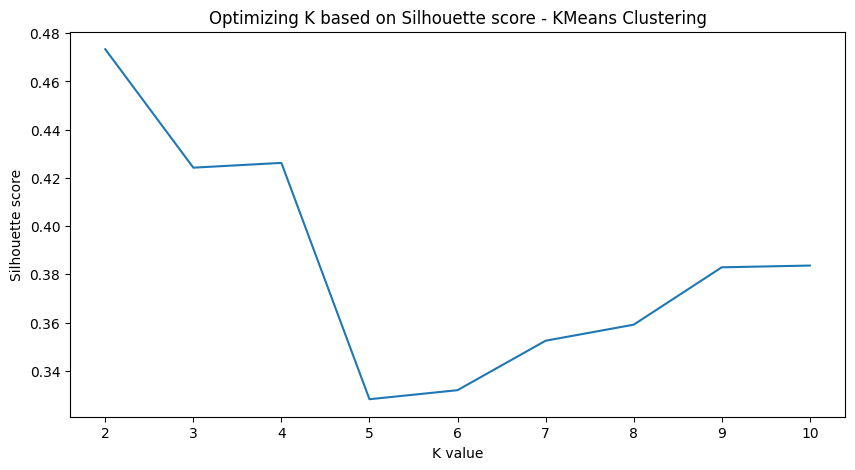

In [26]:
range_n_clusters = range(2,11)
silhouette_avg = []
for num_clusters in range_n_clusters:
  kmeans = KMeans(n_clusters=num_clusters,init='k-means++',random_state=33)
  kmeans.fit(rfm_scaler)
  cluster_labels = kmeans.labels_
  silhouette_avg.append(silhouette_score(rfm_scaler, cluster_labels))

plt.figure(figsize=(10,5))
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('K value')
plt.ylabel('Silhouette score')
plt.title('Optimizing K based on Silhouette score - KMeans Clustering')
plt.show()

In [27]:
kmeans = KMeans(n_clusters=4,init='k-means++',random_state=42)
kmeans.fit(rfm_scaler)
kmeans_silhouette_score = silhouette_score(rfm_scaler, kmeans.labels_)
print("Silhoutte score: ", kmeans_silhouette_score)
rfm_scaler['kmeans_cluster'] = kmeans.labels_

Silhoutte score:  0.42655481214224894


In [28]:
rfm_scaler


,recency,frequency,monetary,kmeans_cluster
0,0.635552,-0.633332,-0.721474,3
1,-0.382919,0.346093,0.241439,0
2,0.037482,-0.633332,0.474220,0
3,1.829189,4.263795,5.964352,1
4,-0.618143,-0.633332,-0.693005,0
...,...,...,...,...
27021,0.675590,-0.633332,0.758909,3
27022,-0.935945,1.325519,0.502119,2
27023,0.565485,0.346093,0.350760,3
27024,-0.738257,-0.633332,-0.806976,0


In [29]:
rfm_melted = pd.melt(rfm_scaler, id_vars=['kmeans_cluster'], value_vars=['recency', 'frequency', 'monetary'],
                    var_name='Metric', value_name='Value')

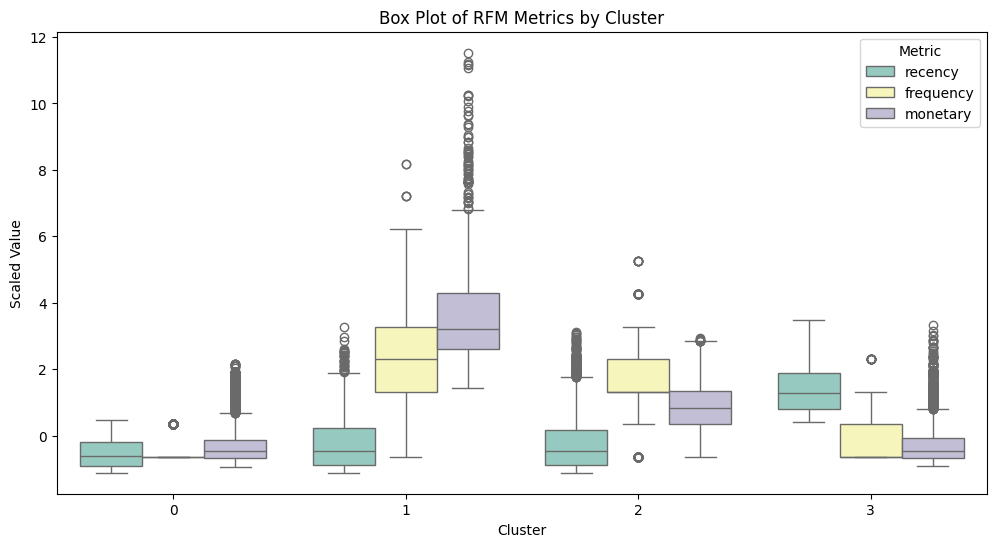

In [30]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='kmeans_cluster', y='Value', hue='Metric', data=rfm_melted, palette='Set3')
plt.title('Box Plot of RFM Metrics by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Scaled Value')
plt.show()

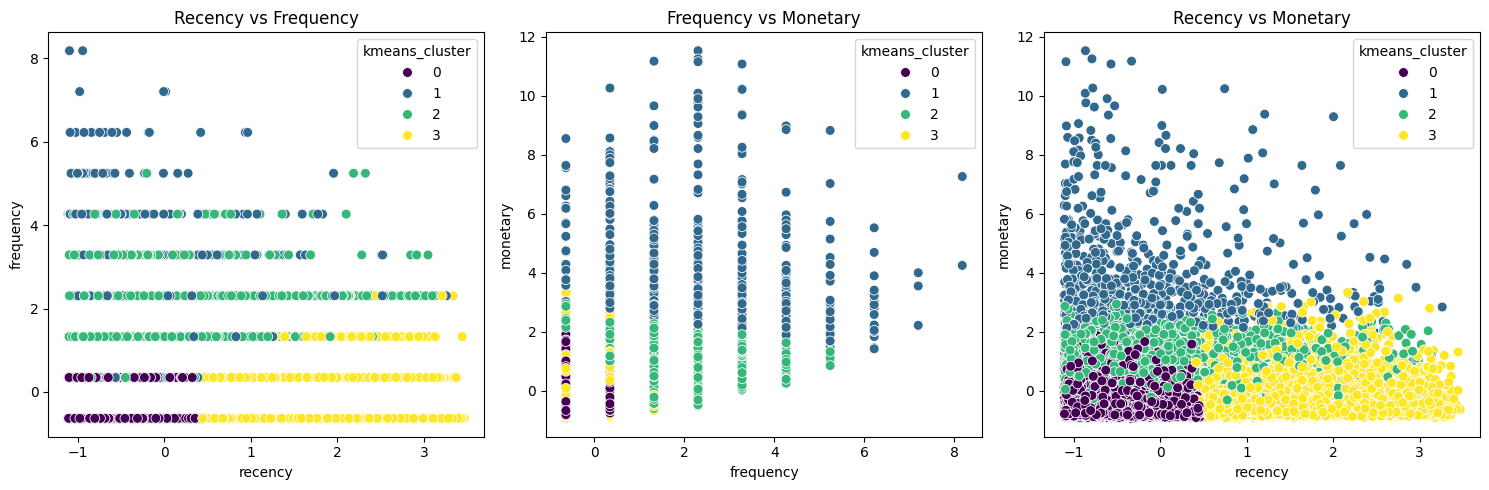

In [31]:

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='recency', y='frequency', hue='kmeans_cluster', data=rfm_scaler, palette='viridis', s=50)
plt.title('Recency vs Frequency')

plt.subplot(1, 3, 2)
sns.scatterplot(x='frequency', y='monetary', hue='kmeans_cluster', data=rfm_scaler, palette='viridis', s=50)
plt.title('Frequency vs Monetary')

plt.subplot(1, 3, 3)
sns.scatterplot(x='recency', y='monetary', hue='kmeans_cluster', data=rfm_scaler, palette='viridis', s=50)
plt.title('Recency vs Monetary')

plt.tight_layout()
plt.show()

In [32]:
fig = px.scatter_3d(rfm_scaler, x='recency', y='frequency', z='monetary',
                    color='kmeans_cluster', opacity=0.5,
                    labels={'recency': 'Recency', 'frequency': 'Frequency', 'monetary': 'Monetary'},
                    title='3D Visualization of RFM Clusters')

fig.show()